<a href="https://colab.research.google.com/github/divyansh9589/ML-LAB/blob/main/ML_Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [14]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
test_labels


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
from keras import models
from keras import layers
network = models.Sequential()
# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28, )))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
from google.colab import drive
drive.mount('/content/drive')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.


In [18]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
train_labels
test_labels = to_categorical(test_labels)
test_labels


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
network.fit(train_images, train_labels, epochs=160, batch_size=512)

Epoch 1/160
118/118 [==============================] - 1s 5ms/step - loss: 2.3508 - accuracy: 0.0975
Epoch 2/160
118/118 [==============================] - 1s 5ms/step - loss: 2.3165 - accuracy: 0.1001
Epoch 3/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2999 - accuracy: 0.1540
Epoch 4/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2897 - accuracy: 0.1435
Epoch 5/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2820 - accuracy: 0.1387
Epoch 6/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2752 - accuracy: 0.1467
Epoch 7/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2687 - accuracy: 0.1682
Epoch 8/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2622 - accuracy: 0.2023
Epoch 9/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2555 - accuracy: 0.2379
Epoch 10/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2485 - accura

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy: {:.5f} '.format(test_acc))
test_acc


313/313 [==============================] - 1s 2ms/step - loss: 0.7296 - accuracy: 0.8220
Test Accuracy: 0.82200 


0.8220000267028809

Epoch 1/5
79/79 [==============================] - 2s 29ms/step - loss: 0.7462 - accuracy: 0.8190 - val_loss: 0.7329 - val_accuracy: 0.8252
Epoch 2/5
79/79 [==============================] - 1s 16ms/step - loss: 0.7437 - accuracy: 0.8205 - val_loss: 0.7306 - val_accuracy: 0.8266
Epoch 3/5
79/79 [==============================] - 1s 19ms/step - loss: 0.7413 - accuracy: 0.8210 - val_loss: 0.7282 - val_accuracy: 0.8273
Epoch 4/5
79/79 [==============================] - 1s 12ms/step - loss: 0.7389 - accuracy: 0.8217 - val_loss: 0.7259 - val_accuracy: 0.8276
Epoch 5/5
79/79 [==============================] - 1s 15ms/step - loss: 0.7364 - accuracy: 0.8222 - val_loss: 0.7236 - val_accuracy: 0.8282
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


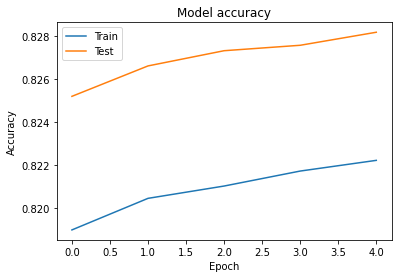

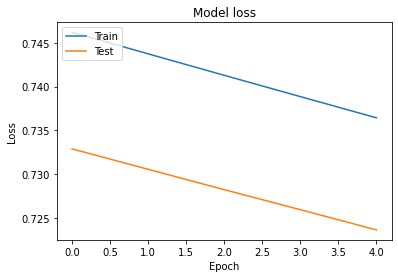

In [21]:
from keras.utils import plot_model
plot_model(network, to_file='model.png')
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
